# Tutorial Week 8 - CART models

## Question 1

#### Here we consider the "Hitters" data discussed in lectures.  Start by making the following imports.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.model_selection as skm
from sklearn.tree import (DecisionTreeClassifier as DTC,
                          DecisionTreeRegressor as DTR,
                          plot_tree)
from sklearn.metrics import (accuracy_score,
                             log_loss)

#### Next, read in the data.  You can read more about the data here 

https://islp.readthedocs.io/en/latest/datasets/Hitters.html

In [3]:
Hitters = pd.read_csv('Hitters.csv',
                     na_values='?',sep=',',index_col=0)
Hitters.columns

Index(['AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years', 'CAtBat',
       'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks', 'League', 'Division',
       'PutOuts', 'Assists', 'Errors', 'Salary', 'NewLeague'],
      dtype='object')

### Now answer the following questions

-  #### (a) How many rows and columns are in the data frame?

In [4]:
Hitters.shape

(322, 20)

-  #### (b) Delete any rows with missing data.  How many observations remain?

In [5]:
Hitters2 = Hitters.dropna()
Hitters2.shape

(263, 20)

-  #### (c) Extract the matrix of features as a data frame and the response vector y as the log of Salary.

In [6]:
feature_names = list(Hitters2.columns)
X = Hitters2[feature_names[:7]]
y = np.log(Hitters2['Salary'])

-  #### (d) Initialize a regression tree estimator by typing
> ```reg = DTR(min_samples_leaf=15)```  
   #### Look at the help to see what other options are available in initializing the regression tree.
-  #### (e) Fit the model to all the data and plot it, without pruning
   

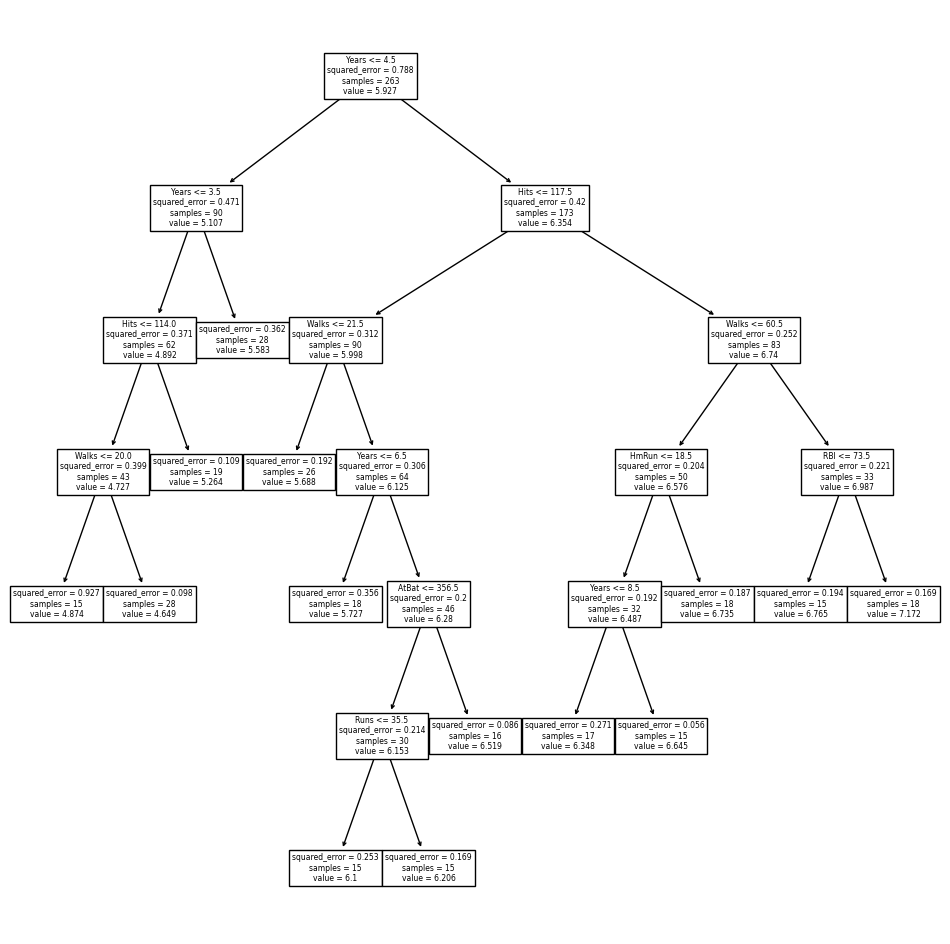

In [8]:
reg = DTR(min_samples_leaf=15)
reg.fit(X, y)
ax = plt.subplots(figsize=(12,12))[1]
plot_tree(reg,
          feature_names=feature_names,
          ax=ax);

- #### (f) Fit a regression tree to the training data after a training/test set split of 70%/30%, without pruning.  Plot the fitted tree to the training data.  

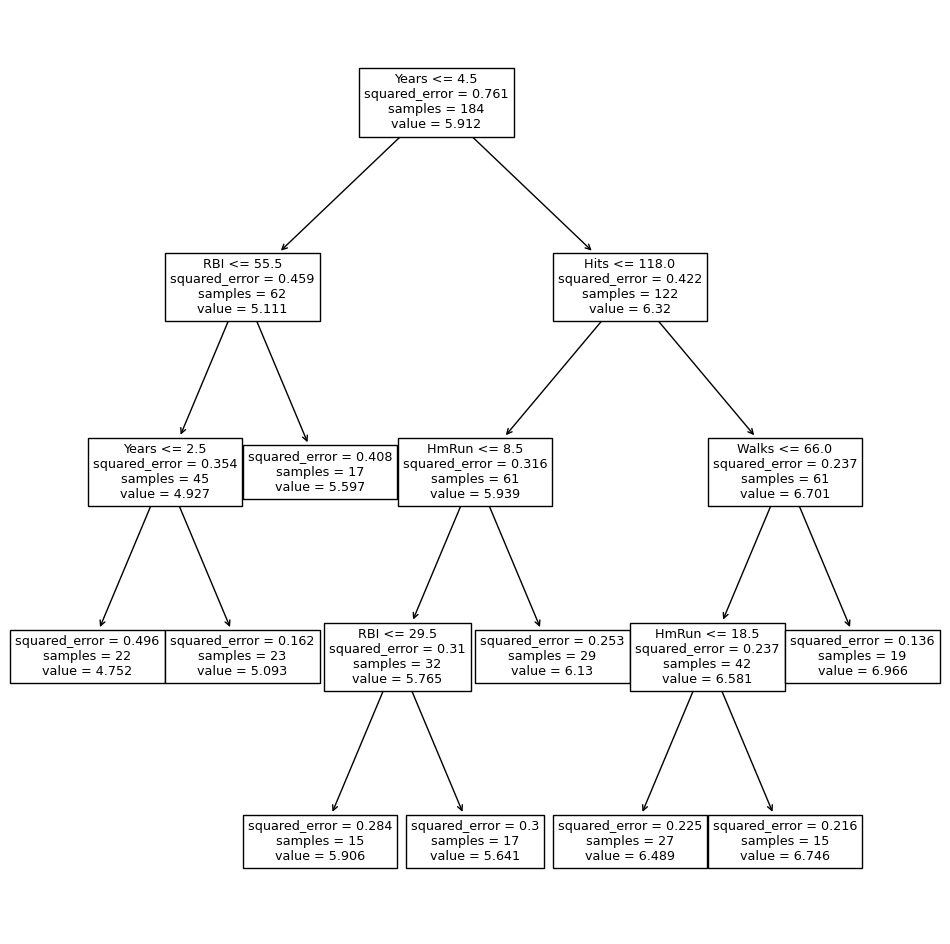

In [9]:
(X_train,
 X_test,
 y_train,
 y_test) = skm.train_test_split(X,
                                y,
                                test_size=0.3,
                                random_state=0)

reg = DTR(min_samples_leaf=15)
reg.fit(X_train, y_train)
ax = plt.subplots(figsize=(12,12))[1]
plot_tree(reg,
          feature_names=feature_names,
          ax=ax);

- #### (g) What is the RMSE for your fitted tree on the test data?

In [10]:
np.mean((y_test - reg.predict(X_test))**2)

0.3459822060513607

- #### (h) Using 5-fold cross-validation to prune the tree using cost-complexity pruning.  What is the test RMSE after pruning?

In [11]:
ccp_path = reg.cost_complexity_pruning_path(X_train, y_train)
kfold = skm.KFold(5,
                  shuffle=True,
                  random_state=10)
grid = skm.GridSearchCV(reg,
                        {'ccp_alpha': ccp_path.ccp_alphas},
                        refit=True,
                        cv=kfold,
                        scoring='neg_mean_squared_error')
G = grid.fit(X_train, y_train)
best_ = grid.best_estimator_
np.mean((y_test - best_.predict(X_test))**2)

0.3529390340063238

- #### (i) Plot the pruned tree.

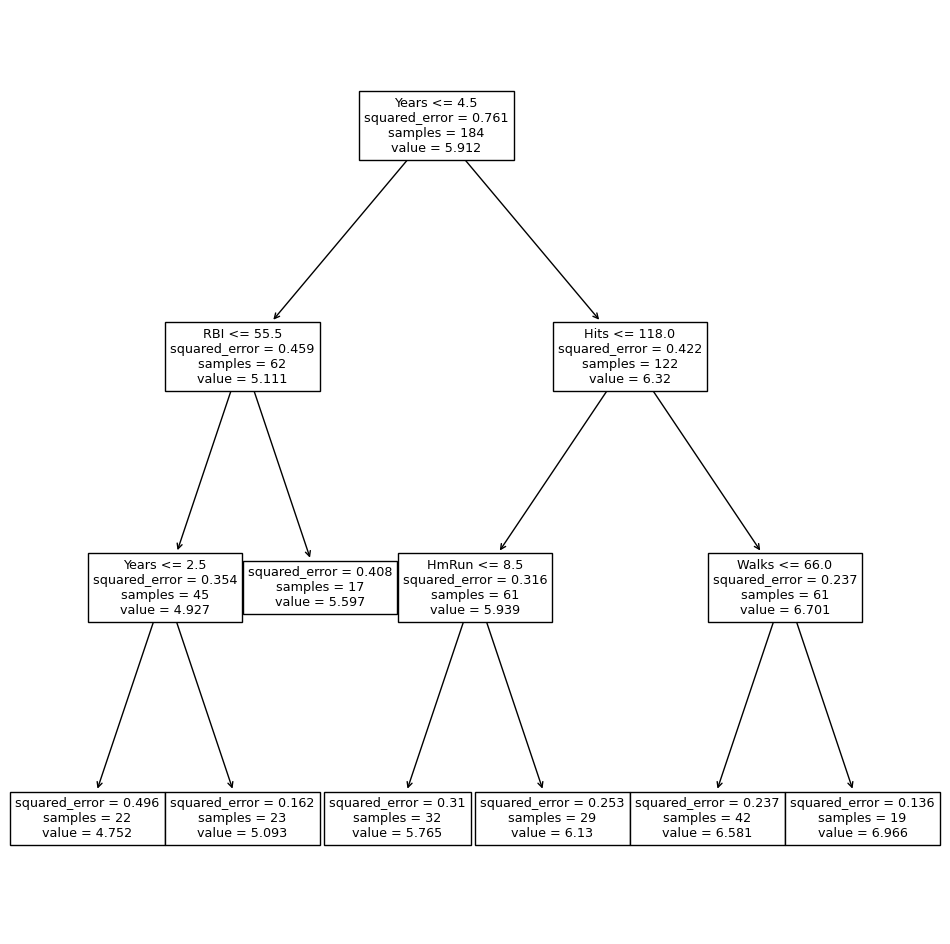

In [12]:
ax = plt.subplots(figsize=(12,12))[1]
plot_tree(G.best_estimator_,
          feature_names=feature_names,
          ax=ax);

## Question 2

#### Here we consider the Singlish data discussed in lectures.  Start by making the following imports

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.model_selection as skm
import statsmodels.api as sm
from sklearn.tree import (DecisionTreeClassifier as DTC,
                          DecisionTreeRegressor as DTR,
                          plot_tree)
from sklearn.metrics import (accuracy_score, confusion_matrix)

#### Next read in the data to a pandas data frame and take a look at a few of the Singlish and Australian slang phrases:

In [14]:
Singlish = pd.read_csv('Singlish.csv')
Singlish.head()

,a,e,h,s,g,l,m,label,phrase
0,0.142857,0.0,0.0,0.0,0.00,0.142857,0.000000,S,Act blur
1,0.500000,0.0,0.0,0.0,0.25,0.000000,0.000000,S,Agak agak
2,0.200000,0.0,0.2,0.0,0.00,0.000000,0.000000,S,Aiyoh
3,0.500000,0.0,0.0,0.0,0.00,0.166667,0.166667,S,Alamak
4,0.200000,0.0,0.0,0.0,0.00,0.000000,0.000000,S,Arrow


In [15]:
Australian = (Singlish['label']=='A')
Singlish[Australian].head()

,a,e,h,s,g,l,m,label,phrase
53,0.250000,0.000000,0.0,0.00,0.0,0.000000,0.0,A,Arvo
54,0.166667,0.166667,0.0,0.25,0.0,0.083333,0.0,A,Aussie Salute
55,0.333333,0.000000,0.0,0.00,0.0,0.000000,0.0,A,Avo
56,0.250000,0.000000,0.0,0.00,0.0,0.250000,0.0,A,Bail
57,0.166667,0.166667,0.0,0.00,0.0,0.000000,0.0,A,Barbie


### Now answer the following questions.

- #### (a) How many rows and columns are in the data frame?

In [16]:
Singlish.shape

(124, 9)

- #### (b) Extract the matrix of features as a data frame and the response vector y as 'label'.

In [17]:
feature_names=list(Singlish.columns)[:7]
X=Singlish[feature_names]
y=Singlish['label']
X.head()

,a,e,h,s,g,l,m
0,0.142857,0.0,0.0,0.0,0.00,0.142857,0.000000
1,0.500000,0.0,0.0,0.0,0.25,0.000000,0.000000
2,0.200000,0.0,0.2,0.0,0.00,0.000000,0.000000
3,0.500000,0.0,0.0,0.0,0.00,0.166667,0.166667
4,0.200000,0.0,0.0,0.0,0.00,0.000000,0.000000


- #### (c) Do a training/test set split of 50%/50%, train a classification tree on the training data without pruning and plot the fitted tree.

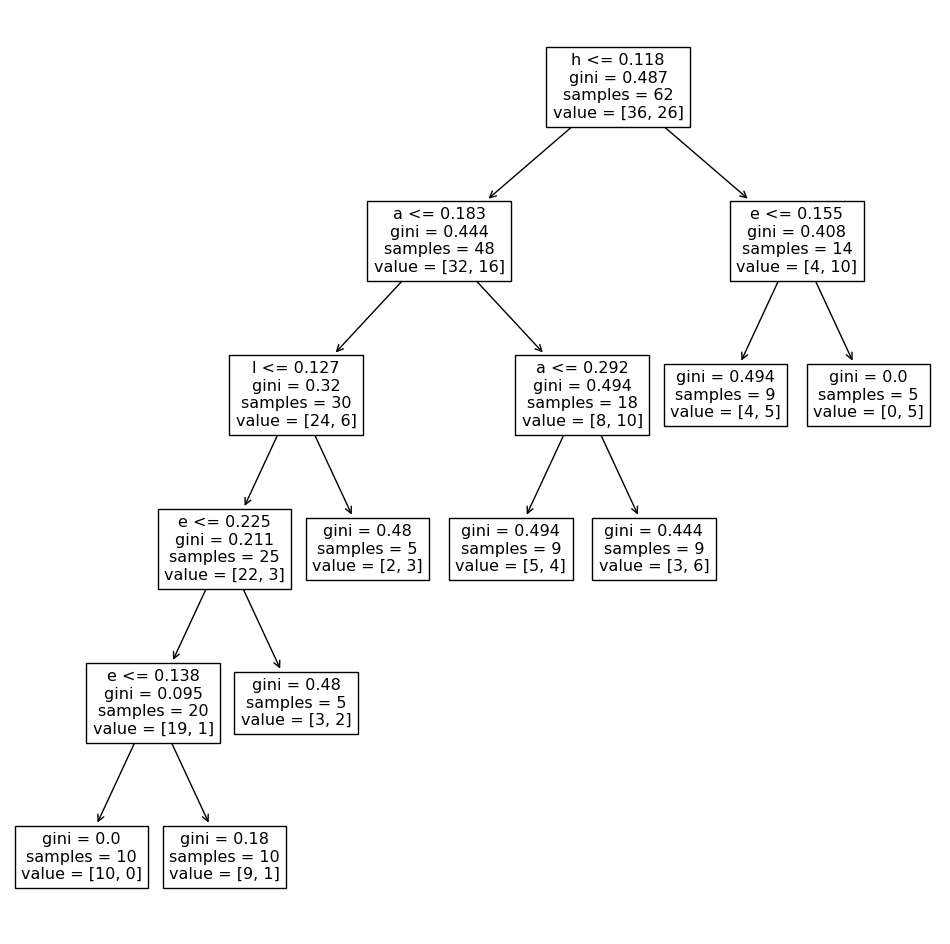

In [18]:
(X_train,
 X_test,
 y_train,
 y_test) = skm.train_test_split(X,
                                y,
                                test_size=0.5,
                                random_state=0)

clf = DTC(min_samples_leaf=5)
clf.fit(X_train, y_train)
ax = plt.subplots(figsize=(12,12))[1]
plot_tree(clf,
          feature_names=feature_names,
          ax=ax);

- #### (d) What is the training set accuracy?  What is the test set accuracy?

In [18]:
accuracy_score(y_train,clf.predict(X_train))

0.7419354838709677

In [19]:
accuracy_score(y_test,clf.predict(X_test))

0.6451612903225806

- #### (e) Use ten-fold cross-validation on the training data to choose the optimal $\alpha$ value for cost-complexity pruning. 
- #### (f) For the optimal $\alpha$ from part (e), and the fitted tree to the training data, what is the training set accuracy and test set accuracy?

In [22]:
ccp_path = clf.cost_complexity_pruning_path(X_train, y_train)
kfold = skm.KFold(10,
                  shuffle=True,
                  random_state=0)
grid = skm.GridSearchCV(clf,
                        {'ccp_alpha': ccp_path.ccp_alphas},
                        refit=True,
                        cv=kfold,
                        scoring='accuracy')
G = grid.fit(X_train, y_train)

In [25]:
best_ = grid.best_estimator_
accuracy_score(y_train,best_.predict(X_train))

0.7419354838709677

In [26]:
accuracy_score(y_test,best_.predict(X_test))

0.6451612903225806


- #### (g) Evaluate the performance of the classifier for part (f) by comparing with classification to the dominant class, as well as logistic regression.  

In [27]:
np.mean(y_test=='A')

0.5645161290322581

In [28]:
lreg = sm.GLM(np.asarray(y_train=="A"),np.asarray(X_train),family=sm.families.Binomial())
results = lreg.fit()
prtest = results.predict(X_test)
classpred = np.where(prtest>0.5,True,False)
accuracy_score((y_test=="A"),classpred)

0.6451612903225806